<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
<div style="padding-top:35px;"></div>
# Descriptive Statistics Review

According to Ding Zhou, Chief Scientist at Klout, a klout score is a number that measures one's influence across the internet, primarily the social media.

In [39]:
%matplotlib inline

In [53]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import math

sns.set(rc={"figure.figsize": (8.5, 5.5)})
sns.set_style('white')
current_palette = matplotlib.colors.hex2color('#03A9F4')

I have a dataset of klout scores in a CSV file. The file has no header, so I specify my own column name called `Score` upon importing.

In [2]:
filepath = '.\\datasets\\klout_scores_01.csv'
klout_df = pd.read_csv(filepath, names=['Score'])

Show the first five records of the klout score dataset.

In [3]:
klout_df[0:4]

,Score
0,25.104179
1,60.908747
2,23.222238
3,51.553491


Print out the structure of the klout dataset.

In [4]:
klout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 1 columns):
Score    1048 non-null float64
dtypes: float64(1)
memory usage: 8.3 KB


The dataset has 1048 records and 1 column called `Score`. There are no empty or null values in the `Score` column.  The single column holds values that consist of double-precision floating point data types.

### Population Parameters

Let's show the mean and standard deviation of the klout scores. We will use the standard deviation for the population instead of sample standard deviation in measuring the dispersion of klout scores.

If you'd like to find the sample standard deviation, you would have to use [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) and pass `ddof=1` in your `numpy.std()` function:

`klout_sample_std  = np.std(klout_df['Score'], ddof=1)`

In [5]:
klout_scores = klout_df['Score']
klout_mean = np.mean(klout_scores)
klout_std  = np.std(klout_scores)
print("Population Mean: {0} \nPopulation Standard Deviation: {1}".format(klout_mean, klout_std))

Population Mean: 37.7190548325 
Population Standard Deviation: 16.0366584217


Another way of getting at a description of the parameters of the klout dataset is by using the `describe()` function.

<strong>BEWARE</strong>: The standard deviation parameter of the `describe()` function is for finding the standard deviation of a sample because it uses an unbiased estimator (`n - 1`) by default. 

In [6]:
klout_df.describe()

,Score
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


The distribution of klout data is shown below. 

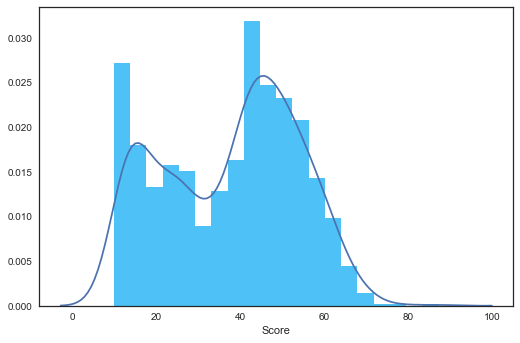

In [57]:
sns.distplot(klout_scores, bins=20, hist_kws={"alpha": 0.7, "color": current_palette});

The histogram shows that the distribution of klout scores is bimodal with a population mean of approximately 37.72.

## Sampling Distribution

Let's check the skew of the klout population scores.

In [8]:
klout_skew = stats.skew(klout_scores)
print("Klout population score skew: {0}".format(klout_skew))

Klout population score skew: -0.134510400248


The distribution of klout scores does not appear to have a normal skew. This characteristic may be exhibited in any sample that we draw from the population. I'll take a sample from the klout score population to verify this.

Below, we take a sample of size 35 from the klout score population and plot a histogram.

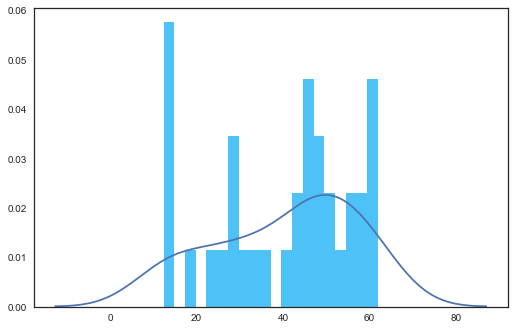

In [77]:
np.random.seed(2)
klout_scores_sample = np.random.choice(a=klout_scores, size=35)

plt.figure(figsize=(8.5, 5.5))
sns.distplot(klout_scores_sample, bins=20, hist_kws={"alpha": 0.7, "color": current_palette});

As we can see, the sample of klout scores roughly exhibits a similar bimodal shape as the population from which it was derived. Can we apply the statistical tools that assume a normal distribution to the klout dataset?

The central limit theorem would still allow us to use statistical tools over the klout dataset even if the underlying distribution is itself not normally distributed. 

The central limit theorem proposes that the distribution of sample means (sampling distribution) will be normally distributed and we can use the sample mean as if it were drawn from a normal distribution.

To illustrate this, let's take 1,000 samples from the population of klout scores with each sample having a sample size of 35 (`n=35`). We then get the mean (point estimate) from each sample and collect the means to form a sampling distribution of sample means.

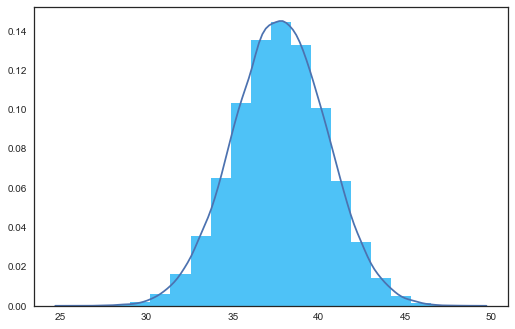

In [73]:
np.random.seed(2)
sample_means = []
n = 35

for x in range(100000):
    sample = np.random.choice(a=klout_scores, size=n)
    sample_means.append(sample.mean())
    
plt.figure(figsize=(8.5, 5.5))
sns.distplot(sample_means, bins=20, hist_kws={"alpha": 0.7, "color": current_palette});

The sampling distribution of sample means tend to be nearly normal. This is despite the bimodal shape of the underlying klout score population distribution from which the samples were drawn.  

Moreover, the mean of the sample means or the mean of the sampling distribution seems to approach the true population mean. 

However, it is interesting to note that the standard deviation of the sample means is much lower than the population standard deviation as we can expect the means of the sample means to be closer to each other and not dispersed.

In [74]:
print("Mean of the Sampling Distribution: {0}".format(np.mean(sample_means)))

Mean of the Sampling Distribution: 37.724768214


### Standard Error 

The standard deviation of the distribution of sample means (sampling distribution) is the population standard deviation divided by the square root of the sample size (n). This is also called the *standard error*.



$$SE = \frac{\sigma} {\sqrt{n}}$$

> Most of the time, the population standard deviation is not available. So, we use the point estimate of the standard deviation from a sample for $\sigma$.

In [126]:
sampling_dist_std = klout_std / math.sqrt(n)
print("Standard Deviation of the Sampling Distribution: {0}".format(sampling_dist_std))

Standard Deviation of the Sampling Distribution: 2.71069001935


In [61]:
# %matplotlib inline
# from plotnine import *
# from plotnine.data import *

# ggplot(klout_df, aes(x='Score')) + geom_histogram()   


### Location of Mean on Sampling Distribution


Why is knowing the shape of the sampling distribution important?

A high klout score has something to do with how influential a person is according to hundreds of factors or signals collected from the internet and social media sites.

Let's recap.

The klout score dataset consists of 1,048 klout scores with a population mean of 37.72 and a population standard deviation of 16.04.

A sampling distribution of sample means was constructed from the population using a sample size of 35. The sampling distribution has a mean of 37.72 and a standard deviation of 2.71.

If we take a sample of 35 klout scores with a sample mean of 40:

- Where does the 40 fall in the distribution of sample means of other samples of the same sample size (35)?  

- i.e. How many standard deviations above the mean of the sampling distribution (37.72) does our sample mean of 40 lie?

- i.e. What's the z-score for a mean of 40 given a sampling distribution mean of 37.72 and a standard deviation of 2.71?




$$ z-score = \frac{x - u} {SE} $$

where $u$ is the mean of the sampling distribution, $x$ is the mean of our current sample.

$$ z-score = \frac{40 - 37.72} {2.71} = 0.84 $$